# Assignment 2: predict insurance charges
#### Application of linear regression, decision tree, random forests and gradient boosting

In this assignment you'll predict insurance charges using 6 attributes of customers of a health insurance company. The data is stored in inurance.csv.

### 1 Import libraries and dataset
- import the relevant libraries to load, analyze and visualize the data

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

### 1A import and inspect files
- Load the csv file into a dataframe
- Inspect the dataframe

In [2]:
df = pd.read_csv('insurance.csv')
display(df.head(), df.info(), df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


None

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 2 Convert to numeric and histograms


### 2A convert to numeric
- Three columns contain non-numeric data. Convert the data in these columns to numeric data.
- There are multiple ways to convert non-numeric data. One method is to use the Label Encoder in sklearn.

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['sex'] = pd.to_numeric(le.fit_transform(df['sex']))
df['smoker'] = pd.to_numeric(le.fit_transform(df['smoker']))
df['region'] = pd.to_numeric(le.fit_transform(df['region']))
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### 2B histograms
- Create a histogram of each variable in the dataset

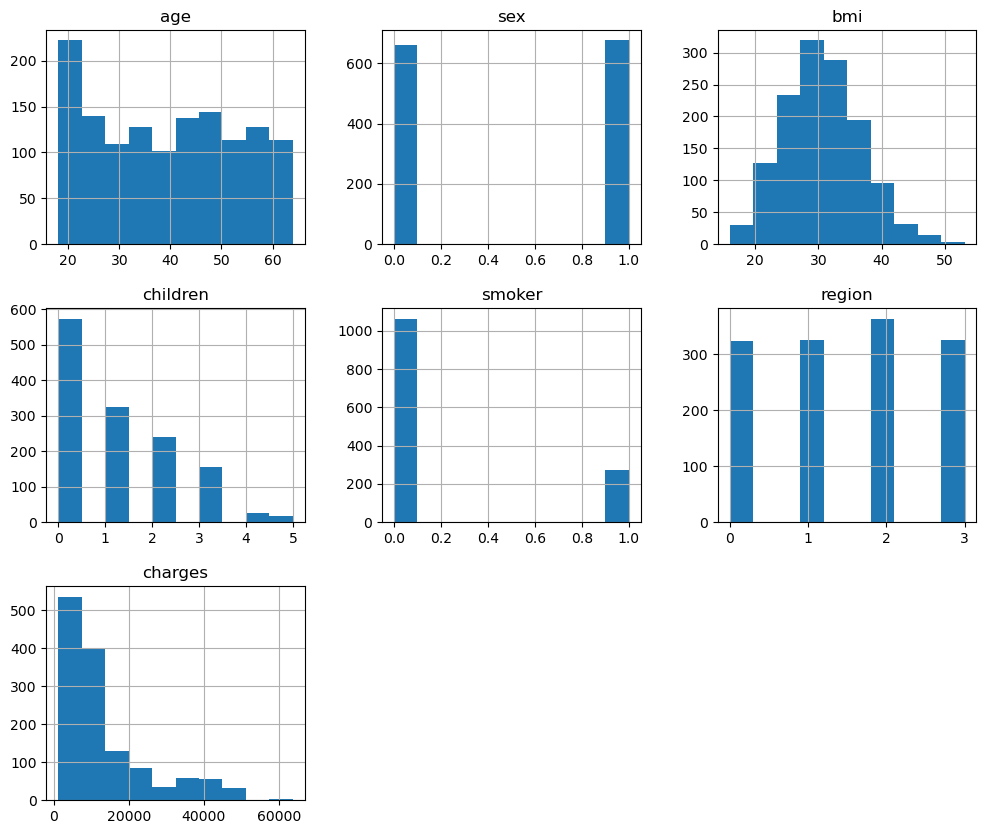

In [4]:
df.hist(figsize=(12,10))
plt.show()

## 3 Correlations, heatmap and boxplots

### 3A correlations
- Create a bar chart that shows the correlations between the independent variables and the dependent variable (charges).

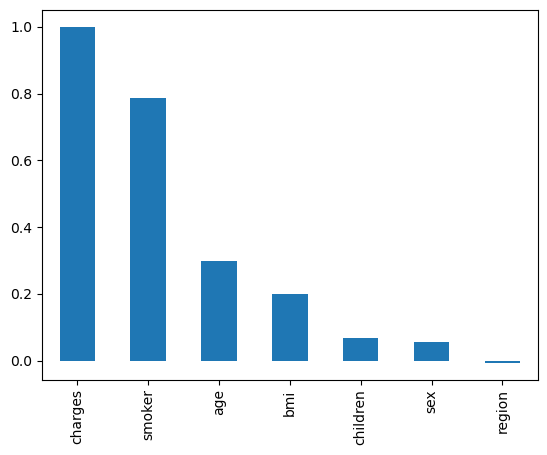

In [5]:
df.corr()['charges'].sort_values(ascending = False).plot(kind='bar')
plt.show()

### 3B heat map
- Create a heat map that visualizes the correlations between all variables.

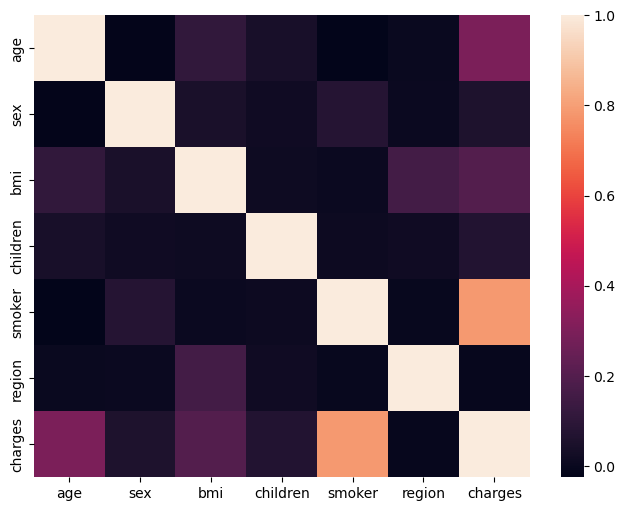

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr())
plt.show()

### 3C Boxplots
- Create a chart that shows boxplots of all independent variables.

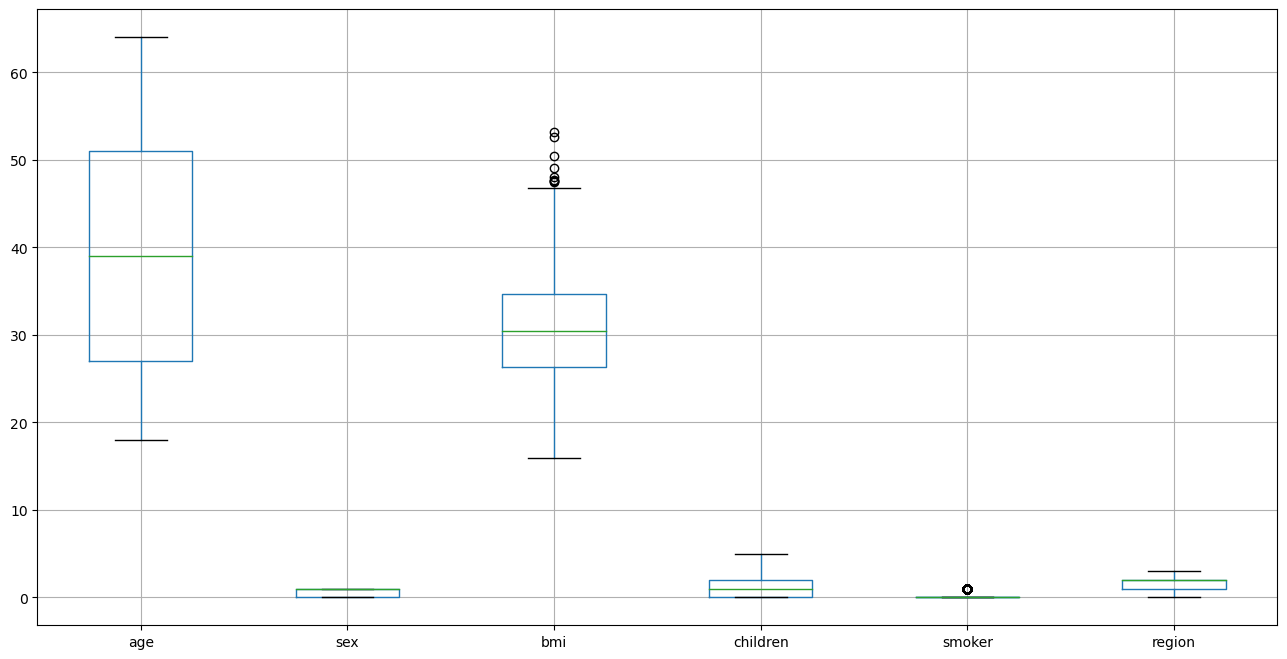

In [21]:
plt.figure(figsize=(16,8))
X = df.drop('charges',axis=1).boxplot()
y = df['charges']
plt.show()


### 3D Outliers
- Which variable(s) have outliers? 
- Name 3 potential approaches to deal with these outliers. 
- What are the pro's and con's of each approach?

In [8]:
#  - Which variable(s) have outliers? 
#    BMI, SMOKER,

#  - Name 3 potential approaches to deal with these outliers. 
#    Ignore, remove, replace

#  - What are the pro's and con's of each approach?

## 4 Linear models

### 4A train-test plit
- Split the data into a train set and a test set

In [41]:
X = df.drop('charges',axis=1)
y = df['charges']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


### 4B Linear regression
- Apply linear regression to predict insurance charges.
- Determine the performance score of the training set
- Determine the performance score of the test set
- What are the regression coefficients? To what extent are they related to the correlation coefficients you found in the heatmap?

In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train, y_train)

In [22]:
print("Training set score: {:.4f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lr.score(X_test, y_test)))
print("lr.coef_:", lr.coef_)
print("lr.intercept_:", lr.intercept_)

Training set score: 0.7368
Test set score: 0.7999
lr.coef_: [  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
lr.intercept_: -11661.983908824413


### 4C Ridge
- Apply ridge regression to predict insurance charges. Run the ridge regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

In [23]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge.score(X_test, y_test)))
print("ridge.coef_:", ridge.coef_)
print("ridge.intercept_:", ridge.intercept_)

Training set score: 0.7368
Test set score: 0.7995
ridge.coef_: [ 2.53796213e+02 -1.87242282e+01  3.28276862e+02  4.44743658e+02
  2.34334464e+04 -2.89543056e+02]
ridge.intercept_: -11624.999727080527


In [24]:
ridge1 = Ridge(alpha=1).fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge1.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge1.score(X_test, y_test)))
print("ridge1.coef_:", ridge1.coef_)
print("ridge1.intercept_:", ridge1.intercept_)

Training set score: 0.7368
Test set score: 0.7995
ridge1.coef_: [ 2.53796213e+02 -1.87242282e+01  3.28276862e+02  4.44743658e+02
  2.34334464e+04 -2.89543056e+02]
ridge1.intercept_: -11624.999727080527


In [25]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge10.score(X_test, y_test)))
print("ridge10.coef_:", ridge10.coef_)
print("ridge10.intercept_:", ridge10.intercept_)

Training set score: 0.7350
Test set score: 0.7949
ridge10.coef_: [  252.13150868    27.24659709   327.20404816   453.19071489
 22281.27220063  -298.15310728]
ridge10.intercept_: -11309.53357170868


In [26]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.4f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.4f}".format(ridge01.score(X_test, y_test)))
print("ridge01.coef_:", ridge01.coef_)
print("ridge01.intercept_:", ridge01.intercept_)

Training set score: 0.7368
Test set score: 0.7998
ridge01.coef_: [  253.97218695   -23.75976696   328.389979     443.83145352
 23555.2656266   -288.61276294]
ridge01.intercept_: -11658.267128761463


### 4D Lasso
- Apply lasso regression to predict insurance charges. Run the lass0 regression at least 4 times with different values of alpha. Each run should be in a different cell.
- Explain what the alpha parameter does. Show the regression coefficients and number of features used of each of the 4 runs to illustrate your answer.
- Determine the accuracy of the train set and of the test set of each run.
- Explain your choice for each alpha value. 
- What alpha value is best? Explain your answer.

In [27]:
from sklearn.linear_model import Lasso

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.4f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lasso.score(X_test, y_test)))
print(lasso.coef_)
print("Number of features used:", np.sum(lasso.coef_ != 0))

Training set score: 0.7368
Test set score: 0.7998
[ 2.53988856e+02 -1.99923381e+01  3.28337191e+02  4.43021793e+02
  2.35625474e+04 -2.87667929e+02]
Number of features used: 6


In [28]:
lasso10 = Lasso(alpha=10).fit(X_train, y_train)
print("Training set score: {:.4f}".format(lasso10.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lasso10.score(X_test, y_test)))
print(lasso10.coef_)
print("Number of features used:", np.sum(lasso10.coef_ != 0))

Training set score: 0.7368
Test set score: 0.7996
[  253.94827311    -0.           327.80766491   436.86422237
 23506.7529265   -280.11227545]
Number of features used: 5


In [29]:
lasso01 = Lasso(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.4f}".format(lasso01.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lasso01.score(X_test, y_test)))
print(lasso01.coef_)
print("Number of features used:", np.sum(lasso01.coef_ != 0))

Training set score: 0.7368
Test set score: 0.7999
[  253.99175812   -23.89006265   328.39596857   443.65814096
 23568.2468175   -288.42434162]
Number of features used: 6


In [30]:
lasso001 = Lasso(alpha=0.01).fit(X_train, y_train)
print("Training set score: {:.4f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.4f}".format(lasso001.score(X_test, y_test)))
print(lasso001.coef_)
print("Number of features used:", np.sum(lasso001.coef_ != 0))

Training set score: 0.7368
Test set score: 0.7999
[  253.99183033   -24.28118127   328.40195886   443.72220464
 23568.81618401  -288.50015985]
Number of features used: 6


## 5 Decision tree

### 5A Decision tree regressor
- Apply the decision tree regressor to predict insurance charges. Run the tree regressor at least 4 times with different values of the max_depth parameter. Each run should be in a different cell.
- Determine the accuracy of the train set and of the test set of each run.
- Explain what the max_depth parameter does. Compare training set accuracy with test set accuracy to illustrate your answer.
- With which settings does the model perform best? Explain your answer.

In [31]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.649


In [33]:
tree3 = DecisionTreeRegressor( max_depth = 3, random_state=0)
tree3.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree3.score(X_test, y_test)))

Accuracy on training set: 0.847
Accuracy on test set: 0.882


In [34]:
tree2 = DecisionTreeRegressor( max_depth = 2, random_state=0)
tree2.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree2.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree2.score(X_test, y_test)))

Accuracy on training set: 0.817
Accuracy on test set: 0.855


In [35]:
tree4 = DecisionTreeRegressor( max_depth = 4, random_state=0)
tree4.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree4.score(X_test, y_test)))

Accuracy on training set: 0.858
Accuracy on test set: 0.881


### 5B Print tree
- Print the decision tree of the settings with the best performance.
Hint: use this link to find more information about printing decision trees: https://mljar.com/blog/visualize-decision-tree/
- Which variables are most important for predicting insurance charges? Explain your answer.

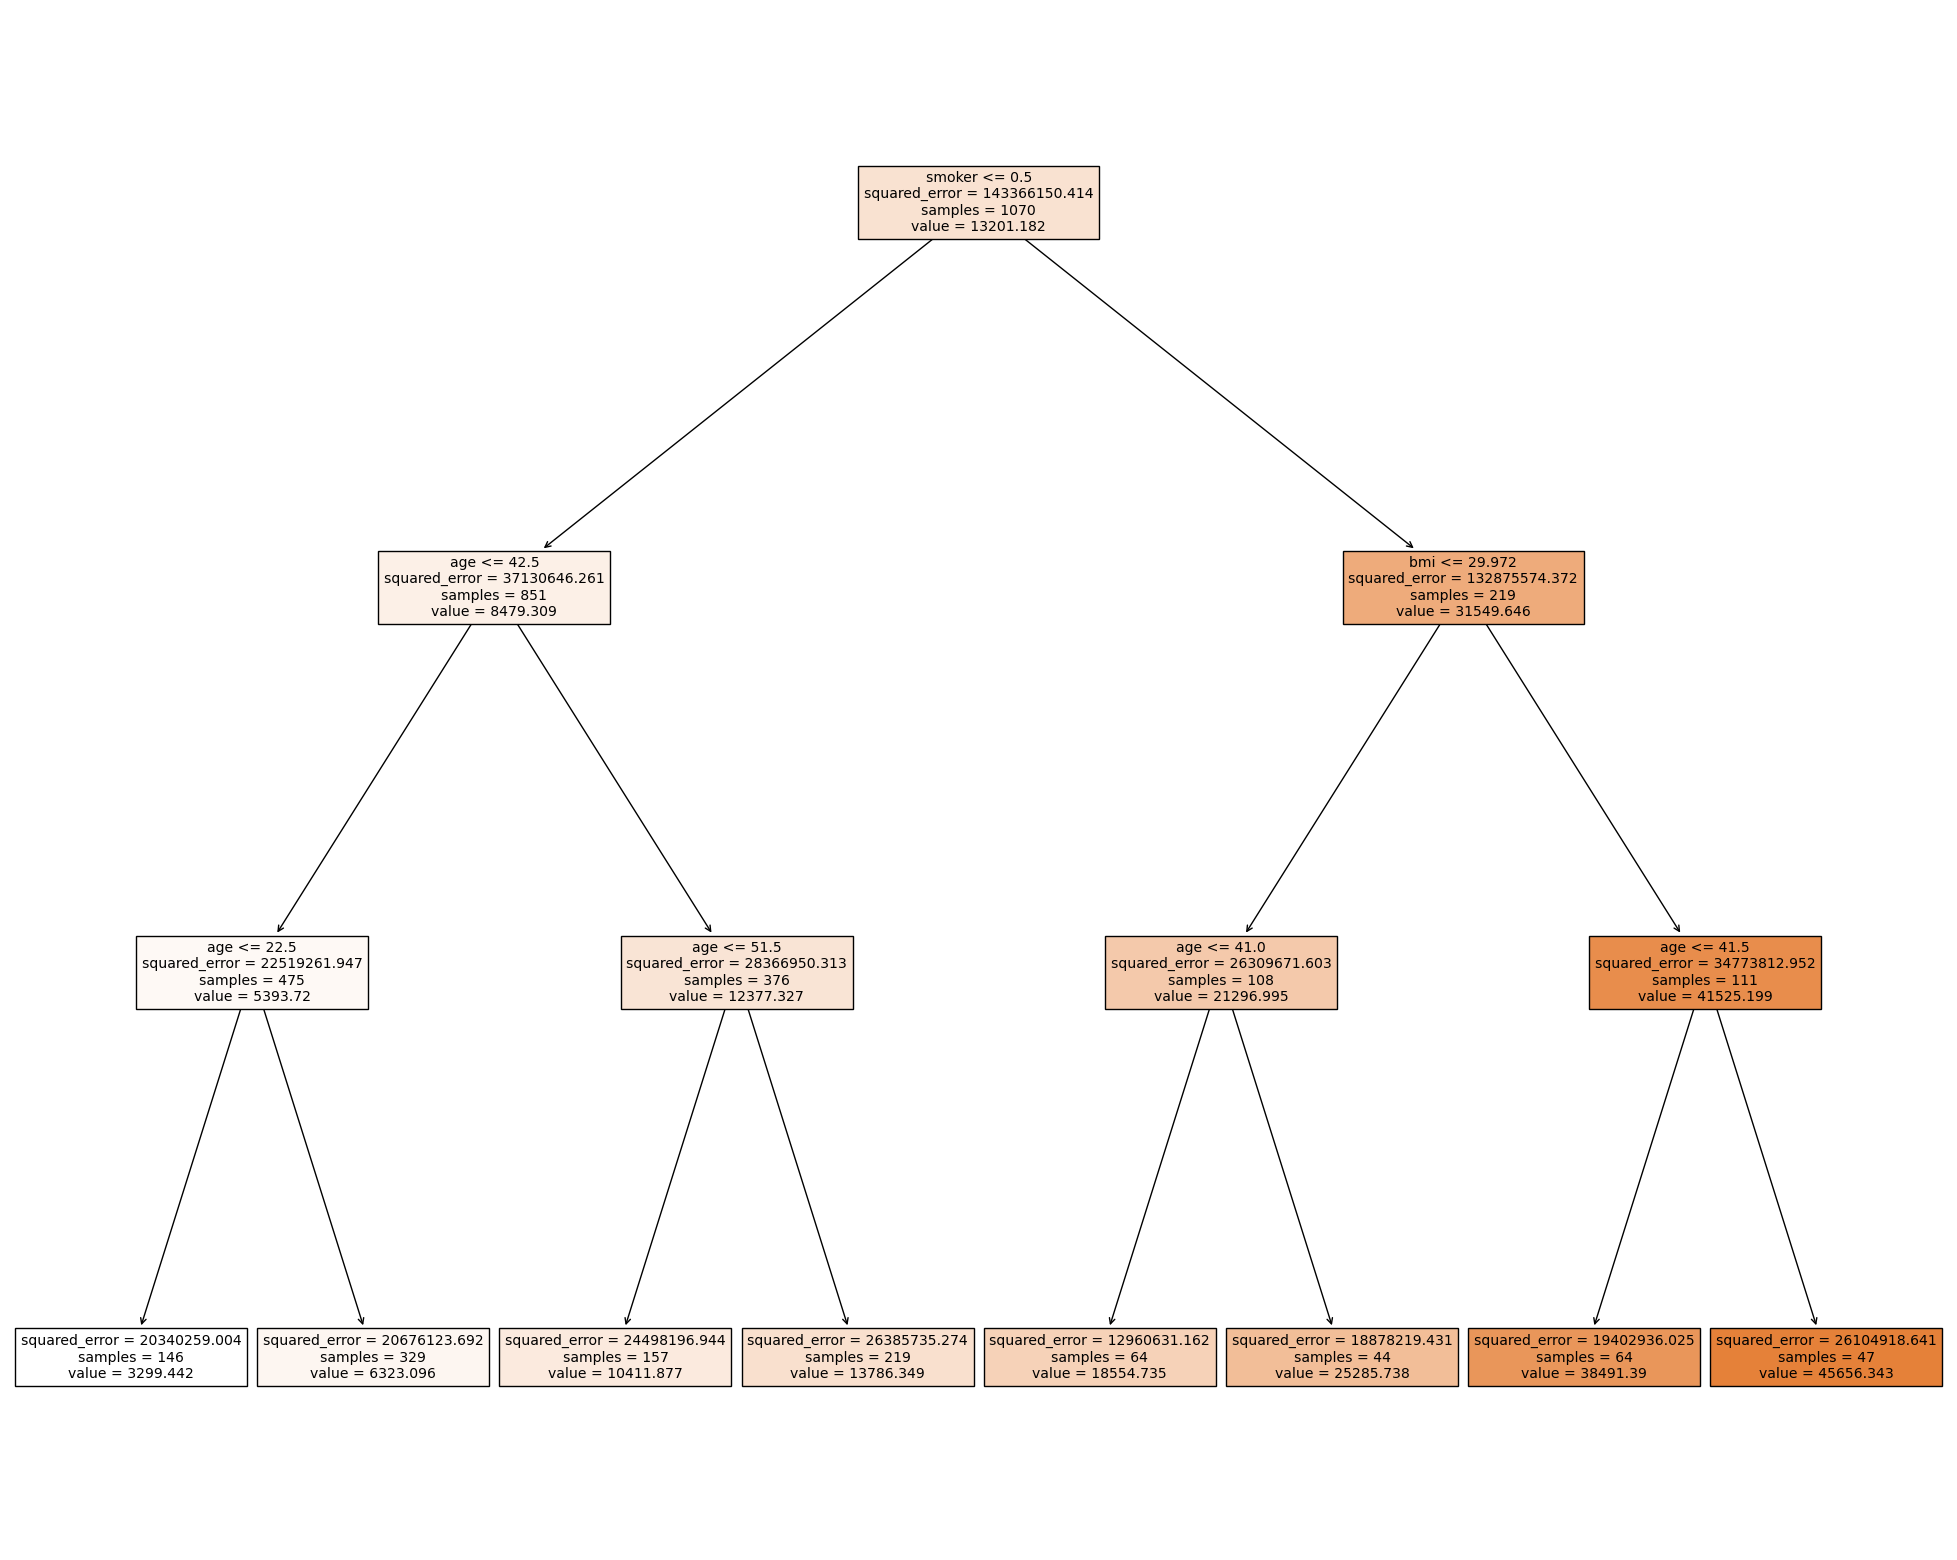

In [52]:
from sklearn import tree as tr
fig = plt.figure(figsize=(25,20))
tr.plot_tree(tree3, feature_names=X.columns, filled=True)
plt.show()

### 5C Feature importance
Do some research to find out about feature importance and how to determine this using sklearn. 
- What is feature importance of a decision tree?
- Determine and plot the feature importance of your model.

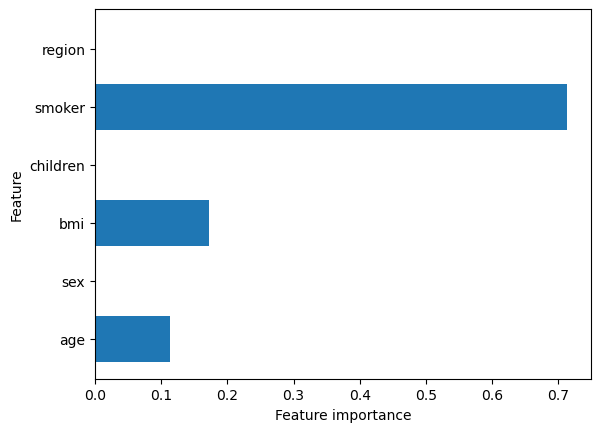

In [53]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")    

plot_feature_importances(tree3)

## 6 Random forest

### 6A Random forest regressor
- Apply the random tree regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the number of trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the max_leaf_nodes parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

In [54]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=250, max_leaf_nodes = 12, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.865
Accuracy on test set: 0.893


### 6B Feature importance
- Determine and plot the feature importance of your model.

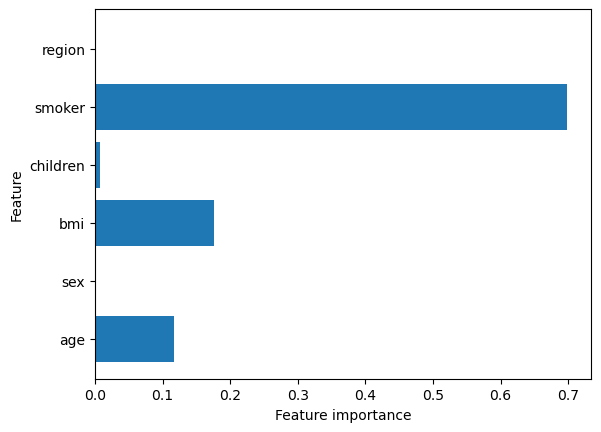

In [55]:
plot_feature_importances(forest)

## 7 Gradient boosting

### 7A Gradient Boosting regressor
- Apply the gradient boosting regressor to predict insurance charges. 
- Run the regressor with different values for the parameter that determines the depth of the trees. Which value returns the best result?
- Try some of the other parameters of the model. What is the impact of these parameters?
- Explain what the learning_rate parameter does? How does it impact the performance of your model?
- With which settings does the model perform best? Explain your answer.

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, max_depth = 2)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.872
Accuracy on test set: 0.901


In [57]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, max_depth = 2, learning_rate = 0.098)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.872
Accuracy on test set: 0.902


### 7B Feature importance
- Determine and plot the feature importance of your model.

In [58]:
from sklearn.ensemble import GradientBoostingRegressor
gbrt = GradientBoostingRegressor(random_state=0, max_depth = 2, learning_rate = 0.098)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.872
Accuracy on test set: 0.902
